In [78]:
import data
import models
import time
from tensorflow.keras.callbacks import CSVLogger, TerminateOnNaN

In [79]:
d = data.Data()

In [80]:
d.split_train_test(28)

In [81]:
d.standarize_data()

In [82]:
vocab_size, max_len, enc_names = d.encode_names()

In [83]:
train_x, train_y, test_x, test_y = d.retreive_data()

In [84]:
multi_train_y = d.make_multi_output_data(train_y)
multi_test_y = d.make_multi_output_data(test_y)

In [85]:
print("Data structure")
print(f"Number of countries: {len(d.countries)}")
# Check if all countries have the same data shape.
for c in d.countries:
    if c.data.shape != d.countries[0].data.shape:
        print(f"{c.name} has shape of {c.data.shape} instead of {d.countries[0].data.shape}")

Data structure
Number of countries: 188


In [86]:
print(f"Shape for country data: {d.countries[0].data.shape}")
print(f"train_x: {train_x.shape}\ntrain_y: {train_y.shape}\ntest_x: {test_x.shape}\ntest_y: {test_y.shape}")
print(f"Shape for multi train y: {multi_train_y.shape} and multi test y: {multi_test_y.shape}")
print(f"Vocab size: {vocab_size} and Max length: {max_len}")
print(f"Enc names: {enc_names.shape} and type: {type(enc_names)}")

Shape for country data: (243, 5)
train_x: (188, 187, 3)
train_y: (188, 28, 3)
test_x: (188, 187, 3)
test_y: (188, 28, 3)
Shape for multi train y: (3, 188, 28) and multi test y: (3, 188, 28)
Vocab size: 235.0 and Max length: 5
Enc names: (188, 5) and type: <class 'numpy.ndarray'>


In [87]:
temporal_shape = train_x[0].shape
word_shape = enc_names[0].shape
units = 100
output_size = 28

Create models.

In [88]:
multi_out_lstm = models.LSTMMultiOutput(temporal_shape, word_shape, units, output_size, activation='tanh')
multi_out_gru = models.GRUMultiOutput(temporal_shape, word_shape, units, output_size)

In [89]:
multi_out_lstm_V2 = models.LSTMMultiOutput_V2(temporal_shape, word_shape, units, output_size, activation='tanh')
multi_out_gru_V2 = models.GRUMultiOutput_V2(temporal_shape, word_shape, units, output_size)

In [90]:
single_out_lstm = models.LSTMSingleOutput(temporal_shape, word_shape, units, output_size)
single_out_gru = models.GRUSingleOutput(temporal_shape, word_shape, units, output_size)

Print model architecture.

In [91]:
print(multi_out_lstm.summary())
print(multi_out_gru.summary())
print(multi_out_lstm_V2.summary())
print(multi_out_gru_V2.summary())
print(single_out_lstm.summary())
print(single_out_gru.summary())

Model: "LSTMMultiOutput"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
time_series_input (InputLayer)  [(None, 187, 3)]     0                                            
__________________________________________________________________________________________________
country_name_input (InputLayer) [(None, 5)]          0                                            
__________________________________________________________________________________________________
LSTM_encoder (LSTM)             (None, 100)          41600       time_series_input[0][0]          
__________________________________________________________________________________________________
country_name (Dense)            (None, 1)            6           country_name_input[0][0]         
____________________________________________________________________________________

Create logger callbacks.

In [92]:
multi_out_lstm_logger = CSVLogger('multi_out_lstm.csv', separator=',')
multi_out_gru_logger = CSVLogger('multi_out_gru.csv', separator=',')
multi_out_lstm_V2_logger = CSVLogger('multi_out_lstm_V2.csv', separator=',')
multi_out_gru_V2_logger = CSVLogger('multi_out_gru_V2.csv', separator=',')
single_out_lstm_logger = CSVLogger('single_out_lstm.csv', separator=',')
single_out_gru_logger = CSVLogger('single_out_gru.csv', separator=',')

In [93]:
ton_back = TerminateOnNaN()

In [94]:
epochs = 300
verbose=1

Train models.

In [95]:
multi_out_lstm_hist = multi_out_lstm.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                         epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 179ms/step - loss: 801.2142 - confirmed_loss: 264.8025 - deceased_loss: 316.2401 - recovered_loss: 220.1717 - confirmed_mean_squared_error: 264.8025 - confirmed_root_mean_squared_error: 16.2728 - deceased_mean_squared_error: 316.2401 - deceased_root_mean_squared_error: 17.7831 - recovered_mean_squared_error: 220.1717 - recovered_root_mean_squared_error: 14.8382
Epoch 2/300
6/6 [==============================] - 1s 175ms/step - loss: 699.4839 - confirmed_loss: 229.2085 - deceased_loss: 278.1922 - recovered_loss: 192.0833 - confirmed_mean_squared_error: 229.2085 - confirmed_root_mean_squared_error: 15.1396 - deceased_mean_squared_error: 278.1922 - deceased_root_mean_squared_error: 16.6791 - recovered_mean_squared_error: 192.0833 - recovered_root_mean_squared_error: 13.8594
Epoch 3/300
6/6 [==============================] - 1s 175ms/step - loss: 600.3019 - confirmed_loss: 194.3498 - deceased_loss: 240.7077 - recovered_loss: 165.2444 - 

6/6 [==============================] - 1s 242ms/step - loss: 63.2790 - confirmed_loss: 21.4983 - deceased_loss: 24.3821 - recovered_loss: 17.3987 - confirmed_mean_squared_error: 21.4983 - confirmed_root_mean_squared_error: 4.6366 - deceased_mean_squared_error: 24.3821 - deceased_root_mean_squared_error: 4.9378 - recovered_mean_squared_error: 17.3987 - recovered_root_mean_squared_error: 4.1712
Epoch 21/300
6/6 [==============================] - 1s 243ms/step - loss: 60.0600 - confirmed_loss: 20.5121 - deceased_loss: 23.0789 - recovered_loss: 16.4691 - confirmed_mean_squared_error: 20.5121 - confirmed_root_mean_squared_error: 4.5290 - deceased_mean_squared_error: 23.0789 - deceased_root_mean_squared_error: 4.8040 - recovered_mean_squared_error: 16.4691 - recovered_root_mean_squared_error: 4.0582
Epoch 22/300
6/6 [==============================] - 1s 242ms/step - loss: 57.3023 - confirmed_loss: 19.6517 - deceased_loss: 21.9813 - recovered_loss: 15.6693 - confirmed_mean_squared_error: 19.6

6/6 [==============================] - 1s 132ms/step - loss: 31.2361 - confirmed_loss: 10.7213 - deceased_loss: 12.1279 - recovered_loss: 8.3869 - confirmed_mean_squared_error: 10.7213 - confirmed_root_mean_squared_error: 3.2743 - deceased_mean_squared_error: 12.1279 - deceased_root_mean_squared_error: 3.4825 - recovered_mean_squared_error: 8.3869 - recovered_root_mean_squared_error: 2.8960
Epoch 41/300
6/6 [==============================] - 1s 83ms/step - loss: 30.2144 - confirmed_loss: 10.3580 - deceased_loss: 11.7411 - recovered_loss: 8.1152 - confirmed_mean_squared_error: 10.3580 - confirmed_root_mean_squared_error: 3.2184 - deceased_mean_squared_error: 11.7411 - deceased_root_mean_squared_error: 3.4265 - recovered_mean_squared_error: 8.1152 - recovered_root_mean_squared_error: 2.8487
Epoch 42/300
6/6 [==============================] - 0s 73ms/step - loss: 29.2671 - confirmed_loss: 10.0217 - deceased_loss: 11.3811 - recovered_loss: 7.8643 - confirmed_mean_squared_error: 10.0217 - c

6/6 [==============================] - 0s 65ms/step - loss: 15.8761 - confirmed_loss: 5.2911 - deceased_loss: 6.2479 - recovered_loss: 4.3371 - confirmed_mean_squared_error: 5.2911 - confirmed_root_mean_squared_error: 2.3002 - deceased_mean_squared_error: 6.2479 - deceased_root_mean_squared_error: 2.4996 - recovered_mean_squared_error: 4.3371 - recovered_root_mean_squared_error: 2.0826
Epoch 61/300
6/6 [==============================] - 0s 64ms/step - loss: 15.3111 - confirmed_loss: 5.0935 - deceased_loss: 6.0296 - recovered_loss: 4.1880 - confirmed_mean_squared_error: 5.0935 - confirmed_root_mean_squared_error: 2.2569 - deceased_mean_squared_error: 6.0296 - deceased_root_mean_squared_error: 2.4555 - recovered_mean_squared_error: 4.1880 - recovered_root_mean_squared_error: 2.0465
Epoch 62/300
6/6 [==============================] - 0s 64ms/step - loss: 14.7914 - confirmed_loss: 4.9124 - deceased_loss: 5.8274 - recovered_loss: 4.0516 - confirmed_mean_squared_error: 4.9124 - confirmed_roo

6/6 [==============================] - 0s 65ms/step - loss: 7.6216 - confirmed_loss: 2.4457 - deceased_loss: 3.0287 - recovered_loss: 2.1472 - confirmed_mean_squared_error: 2.4457 - confirmed_root_mean_squared_error: 1.5639 - deceased_mean_squared_error: 3.0287 - deceased_root_mean_squared_error: 1.7403 - recovered_mean_squared_error: 2.1472 - recovered_root_mean_squared_error: 1.4653
Epoch 81/300
6/6 [==============================] - 0s 66ms/step - loss: 7.3299 - confirmed_loss: 2.3465 - deceased_loss: 2.9143 - recovered_loss: 2.0691 - confirmed_mean_squared_error: 2.3465 - confirmed_root_mean_squared_error: 1.5318 - deceased_mean_squared_error: 2.9143 - deceased_root_mean_squared_error: 1.7071 - recovered_mean_squared_error: 2.0691 - recovered_root_mean_squared_error: 1.4384
Epoch 82/300
6/6 [==============================] - 0s 68ms/step - loss: 7.0499 - confirmed_loss: 2.2517 - deceased_loss: 2.8046 - recovered_loss: 1.9937 - confirmed_mean_squared_error: 2.2517 - confirmed_root_m

6/6 [==============================] - 0s 64ms/step - loss: 3.5446 - confirmed_loss: 1.0753 - deceased_loss: 1.4313 - recovered_loss: 1.0380 - confirmed_mean_squared_error: 1.0753 - confirmed_root_mean_squared_error: 1.0370 - deceased_mean_squared_error: 1.4313 - deceased_root_mean_squared_error: 1.1964 - recovered_mean_squared_error: 1.0380 - recovered_root_mean_squared_error: 1.0188
Epoch 101/300
6/6 [==============================] - 0s 64ms/step - loss: 3.4189 - confirmed_loss: 1.0339 - deceased_loss: 1.3820 - recovered_loss: 1.0031 - confirmed_mean_squared_error: 1.0339 - confirmed_root_mean_squared_error: 1.0168 - deceased_mean_squared_error: 1.3820 - deceased_root_mean_squared_error: 1.1756 - recovered_mean_squared_error: 1.0031 - recovered_root_mean_squared_error: 1.0016
Epoch 102/300
6/6 [==============================] - 0s 65ms/step - loss: 3.2930 - confirmed_loss: 0.9923 - deceased_loss: 1.3325 - recovered_loss: 0.9682 - confirmed_mean_squared_error: 0.9923 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 1.7052 - confirmed_loss: 0.4741 - deceased_loss: 0.7125 - recovered_loss: 0.5186 - confirmed_mean_squared_error: 0.4741 - confirmed_root_mean_squared_error: 0.6886 - deceased_mean_squared_error: 0.7125 - deceased_root_mean_squared_error: 0.8441 - recovered_mean_squared_error: 0.5186 - recovered_root_mean_squared_error: 0.7202
Epoch 121/300
6/6 [==============================] - 0s 65ms/step - loss: 1.6480 - confirmed_loss: 0.4557 - deceased_loss: 0.6904 - recovered_loss: 0.5019 - confirmed_mean_squared_error: 0.4557 - confirmed_root_mean_squared_error: 0.6750 - deceased_mean_squared_error: 0.6904 - deceased_root_mean_squared_error: 0.8309 - recovered_mean_squared_error: 0.5019 - recovered_root_mean_squared_error: 0.7085
Epoch 122/300
6/6 [==============================] - 0s 64ms/step - loss: 1.5920 - confirmed_loss: 0.4379 - deceased_loss: 0.6685 - recovered_loss: 0.4856 - confirmed_mean_squared_error: 0.4379 - confirmed_root

6/6 [==============================] - 0s 64ms/step - loss: 0.9379 - confirmed_loss: 0.2304 - deceased_loss: 0.4157 - recovered_loss: 0.2918 - confirmed_mean_squared_error: 0.2304 - confirmed_root_mean_squared_error: 0.4800 - deceased_mean_squared_error: 0.4157 - deceased_root_mean_squared_error: 0.6447 - recovered_mean_squared_error: 0.2918 - recovered_root_mean_squared_error: 0.5402
Epoch 141/300
6/6 [==============================] - 0s 64ms/step - loss: 0.9160 - confirmed_loss: 0.2234 - deceased_loss: 0.4069 - recovered_loss: 0.2857 - confirmed_mean_squared_error: 0.2234 - confirmed_root_mean_squared_error: 0.4727 - deceased_mean_squared_error: 0.4069 - deceased_root_mean_squared_error: 0.6379 - recovered_mean_squared_error: 0.2857 - recovered_root_mean_squared_error: 0.5345
Epoch 142/300
6/6 [==============================] - 0s 65ms/step - loss: 0.8939 - confirmed_loss: 0.2167 - deceased_loss: 0.3985 - recovered_loss: 0.2786 - confirmed_mean_squared_error: 0.2167 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 0.6455 - confirmed_loss: 0.1394 - deceased_loss: 0.3046 - recovered_loss: 0.2015 - confirmed_mean_squared_error: 0.1394 - confirmed_root_mean_squared_error: 0.3734 - deceased_mean_squared_error: 0.3046 - deceased_root_mean_squared_error: 0.5519 - recovered_mean_squared_error: 0.2015 - recovered_root_mean_squared_error: 0.4489
Epoch 161/300
6/6 [==============================] - 0s 66ms/step - loss: 0.6359 - confirmed_loss: 0.1367 - deceased_loss: 0.3008 - recovered_loss: 0.1984 - confirmed_mean_squared_error: 0.1367 - confirmed_root_mean_squared_error: 0.3698 - deceased_mean_squared_error: 0.3008 - deceased_root_mean_squared_error: 0.5485 - recovered_mean_squared_error: 0.1984 - recovered_root_mean_squared_error: 0.4454
Epoch 162/300
6/6 [==============================] - 0s 68ms/step - loss: 0.6281 - confirmed_loss: 0.1342 - deceased_loss: 0.2980 - recovered_loss: 0.1960 - confirmed_mean_squared_error: 0.1342 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 0.5379 - confirmed_loss: 0.1070 - deceased_loss: 0.2648 - recovered_loss: 0.1661 - confirmed_mean_squared_error: 0.1070 - confirmed_root_mean_squared_error: 0.3270 - deceased_mean_squared_error: 0.2648 - deceased_root_mean_squared_error: 0.5146 - recovered_mean_squared_error: 0.1661 - recovered_root_mean_squared_error: 0.4076
Epoch 181/300
6/6 [==============================] - 0s 65ms/step - loss: 0.5356 - confirmed_loss: 0.1063 - deceased_loss: 0.2635 - recovered_loss: 0.1658 - confirmed_mean_squared_error: 0.1063 - confirmed_root_mean_squared_error: 0.3260 - deceased_mean_squared_error: 0.2635 - deceased_root_mean_squared_error: 0.5134 - recovered_mean_squared_error: 0.1658 - recovered_root_mean_squared_error: 0.4072
Epoch 182/300
6/6 [==============================] - 0s 66ms/step - loss: 0.5340 - confirmed_loss: 0.1056 - deceased_loss: 0.2636 - recovered_loss: 0.1647 - confirmed_mean_squared_error: 0.1056 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.5012 - confirmed_loss: 0.0963 - deceased_loss: 0.2515 - recovered_loss: 0.1534 - confirmed_mean_squared_error: 0.0963 - confirmed_root_mean_squared_error: 0.3103 - deceased_mean_squared_error: 0.2515 - deceased_root_mean_squared_error: 0.5015 - recovered_mean_squared_error: 0.1534 - recovered_root_mean_squared_error: 0.3916
Epoch 201/300
6/6 [==============================] - 0s 65ms/step - loss: 0.5006 - confirmed_loss: 0.0960 - deceased_loss: 0.2513 - recovered_loss: 0.1533 - confirmed_mean_squared_error: 0.0960 - confirmed_root_mean_squared_error: 0.3099 - deceased_mean_squared_error: 0.2513 - deceased_root_mean_squared_error: 0.5013 - recovered_mean_squared_error: 0.1533 - recovered_root_mean_squared_error: 0.3916
Epoch 202/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4994 - confirmed_loss: 0.0958 - deceased_loss: 0.2506 - recovered_loss: 0.1530 - confirmed_mean_squared_error: 0.0958 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.4892 - confirmed_loss: 0.0931 - deceased_loss: 0.2468 - recovered_loss: 0.1492 - confirmed_mean_squared_error: 0.0931 - confirmed_root_mean_squared_error: 0.3051 - deceased_mean_squared_error: 0.2468 - deceased_root_mean_squared_error: 0.4968 - recovered_mean_squared_error: 0.1492 - recovered_root_mean_squared_error: 0.3863
Epoch 221/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4889 - confirmed_loss: 0.0928 - deceased_loss: 0.2468 - recovered_loss: 0.1493 - confirmed_mean_squared_error: 0.0928 - confirmed_root_mean_squared_error: 0.3046 - deceased_mean_squared_error: 0.2468 - deceased_root_mean_squared_error: 0.4968 - recovered_mean_squared_error: 0.1493 - recovered_root_mean_squared_error: 0.3864
Epoch 222/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4888 - confirmed_loss: 0.0927 - deceased_loss: 0.2474 - recovered_loss: 0.1486 - confirmed_mean_squared_error: 0.0927 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 0.4822 - confirmed_loss: 0.0917 - deceased_loss: 0.2427 - recovered_loss: 0.1478 - confirmed_mean_squared_error: 0.0917 - confirmed_root_mean_squared_error: 0.3028 - deceased_mean_squared_error: 0.2427 - deceased_root_mean_squared_error: 0.4927 - recovered_mean_squared_error: 0.1478 - recovered_root_mean_squared_error: 0.3845
Epoch 241/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4817 - confirmed_loss: 0.0916 - deceased_loss: 0.2428 - recovered_loss: 0.1472 - confirmed_mean_squared_error: 0.0916 - confirmed_root_mean_squared_error: 0.3027 - deceased_mean_squared_error: 0.2428 - deceased_root_mean_squared_error: 0.4928 - recovered_mean_squared_error: 0.1472 - recovered_root_mean_squared_error: 0.3837
Epoch 242/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4825 - confirmed_loss: 0.0918 - deceased_loss: 0.2436 - recovered_loss: 0.1470 - confirmed_mean_squared_error: 0.0918 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 0.4768 - confirmed_loss: 0.0911 - deceased_loss: 0.2392 - recovered_loss: 0.1465 - confirmed_mean_squared_error: 0.0911 - confirmed_root_mean_squared_error: 0.3018 - deceased_mean_squared_error: 0.2392 - deceased_root_mean_squared_error: 0.4891 - recovered_mean_squared_error: 0.1465 - recovered_root_mean_squared_error: 0.3828
Epoch 261/300
6/6 [==============================] - 0s 64ms/step - loss: 0.4768 - confirmed_loss: 0.0911 - deceased_loss: 0.2393 - recovered_loss: 0.1464 - confirmed_mean_squared_error: 0.0911 - confirmed_root_mean_squared_error: 0.3019 - deceased_mean_squared_error: 0.2393 - deceased_root_mean_squared_error: 0.4892 - recovered_mean_squared_error: 0.1464 - recovered_root_mean_squared_error: 0.3826
Epoch 262/300
6/6 [==============================] - 0s 66ms/step - loss: 0.4772 - confirmed_loss: 0.0910 - deceased_loss: 0.2396 - recovered_loss: 0.1466 - confirmed_mean_squared_error: 0.0910 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.4705 - confirmed_loss: 0.0904 - deceased_loss: 0.2350 - recovered_loss: 0.1451 - confirmed_mean_squared_error: 0.0904 - confirmed_root_mean_squared_error: 0.3007 - deceased_mean_squared_error: 0.2350 - deceased_root_mean_squared_error: 0.4848 - recovered_mean_squared_error: 0.1451 - recovered_root_mean_squared_error: 0.3809
Epoch 281/300
6/6 [==============================] - 0s 64ms/step - loss: 0.4709 - confirmed_loss: 0.0904 - deceased_loss: 0.2354 - recovered_loss: 0.1451 - confirmed_mean_squared_error: 0.0904 - confirmed_root_mean_squared_error: 0.3006 - deceased_mean_squared_error: 0.2354 - deceased_root_mean_squared_error: 0.4852 - recovered_mean_squared_error: 0.1451 - recovered_root_mean_squared_error: 0.3810
Epoch 282/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4701 - confirmed_loss: 0.0905 - deceased_loss: 0.2348 - recovered_loss: 0.1448 - confirmed_mean_squared_error: 0.0905 - confirmed_root

6/6 [==============================] - 0s 74ms/step - loss: 0.4659 - confirmed_loss: 0.0904 - deceased_loss: 0.2318 - recovered_loss: 0.1437 - confirmed_mean_squared_error: 0.0904 - confirmed_root_mean_squared_error: 0.3006 - deceased_mean_squared_error: 0.2318 - deceased_root_mean_squared_error: 0.4814 - recovered_mean_squared_error: 0.1437 - recovered_root_mean_squared_error: 0.3791


In [96]:
multi_out_gru_hist = multi_out_gru.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                       epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 71ms/step - loss: 665.5833 - confirmed_loss: 217.1845 - deceased_loss: 208.6158 - recovered_loss: 239.7830 - confirmed_mean_squared_error: 217.1845 - confirmed_root_mean_squared_error: 14.7372 - deceased_mean_squared_error: 208.6158 - deceased_root_mean_squared_error: 14.4435 - recovered_mean_squared_error: 239.7830 - recovered_root_mean_squared_error: 15.4849
Epoch 2/300
6/6 [==============================] - 0s 67ms/step - loss: 588.4667 - confirmed_loss: 191.7933 - deceased_loss: 183.6537 - recovered_loss: 213.0197 - confirmed_mean_squared_error: 191.7933 - confirmed_root_mean_squared_error: 13.8489 - deceased_mean_squared_error: 183.6537 - deceased_root_mean_squared_error: 13.5519 - recovered_mean_squared_error: 213.0197 - recovered_root_mean_squared_error: 14.5952
Epoch 3/300
6/6 [==============================] - 0s 68ms/step - loss: 513.7955 - confirmed_loss: 166.9527 - deceased_loss: 159.5331 - recovered_loss: 187.3096 - con

6/6 [==============================] - 0s 68ms/step - loss: 51.0817 - confirmed_loss: 16.8651 - deceased_loss: 16.3818 - recovered_loss: 17.8348 - confirmed_mean_squared_error: 16.8651 - confirmed_root_mean_squared_error: 4.1067 - deceased_mean_squared_error: 16.3818 - deceased_root_mean_squared_error: 4.0474 - recovered_mean_squared_error: 17.8348 - recovered_root_mean_squared_error: 4.2231
Epoch 21/300
6/6 [==============================] - 0s 69ms/step - loss: 41.5787 - confirmed_loss: 13.6181 - deceased_loss: 13.4840 - recovered_loss: 14.4766 - confirmed_mean_squared_error: 13.6181 - confirmed_root_mean_squared_error: 3.6903 - deceased_mean_squared_error: 13.4840 - deceased_root_mean_squared_error: 3.6721 - recovered_mean_squared_error: 14.4766 - recovered_root_mean_squared_error: 3.8048
Epoch 22/300
6/6 [==============================] - 0s 70ms/step - loss: 36.2814 - confirmed_loss: 11.8777 - deceased_loss: 11.8432 - recovered_loss: 12.5605 - confirmed_mean_squared_error: 11.8777

6/6 [==============================] - 0s 69ms/step - loss: 16.0261 - confirmed_loss: 5.1758 - deceased_loss: 5.4670 - recovered_loss: 5.3833 - confirmed_mean_squared_error: 5.1758 - confirmed_root_mean_squared_error: 2.2750 - deceased_mean_squared_error: 5.4670 - deceased_root_mean_squared_error: 2.3382 - recovered_mean_squared_error: 5.3833 - recovered_root_mean_squared_error: 2.3202
Epoch 41/300
6/6 [==============================] - 0s 68ms/step - loss: 15.3281 - confirmed_loss: 4.9384 - deceased_loss: 5.2477 - recovered_loss: 5.1420 - confirmed_mean_squared_error: 4.9384 - confirmed_root_mean_squared_error: 2.2222 - deceased_mean_squared_error: 5.2477 - deceased_root_mean_squared_error: 2.2908 - recovered_mean_squared_error: 5.1420 - recovered_root_mean_squared_error: 2.2676
Epoch 42/300
6/6 [==============================] - 0s 68ms/step - loss: 14.8829 - confirmed_loss: 4.7990 - deceased_loss: 5.1073 - recovered_loss: 4.9766 - confirmed_mean_squared_error: 4.7990 - confirmed_roo

6/6 [==============================] - 0s 69ms/step - loss: 7.3587 - confirmed_loss: 2.3063 - deceased_loss: 2.6847 - recovered_loss: 2.3678 - confirmed_mean_squared_error: 2.3063 - confirmed_root_mean_squared_error: 1.5186 - deceased_mean_squared_error: 2.6847 - deceased_root_mean_squared_error: 1.6385 - recovered_mean_squared_error: 2.3678 - recovered_root_mean_squared_error: 1.5388
Epoch 61/300
6/6 [==============================] - 0s 69ms/step - loss: 7.0500 - confirmed_loss: 2.2032 - deceased_loss: 2.5828 - recovered_loss: 2.2640 - confirmed_mean_squared_error: 2.2032 - confirmed_root_mean_squared_error: 1.4843 - deceased_mean_squared_error: 2.5828 - deceased_root_mean_squared_error: 1.6071 - recovered_mean_squared_error: 2.2640 - recovered_root_mean_squared_error: 1.5047
Epoch 62/300
6/6 [==============================] - 0s 69ms/step - loss: 6.8228 - confirmed_loss: 2.1286 - deceased_loss: 2.5059 - recovered_loss: 2.1883 - confirmed_mean_squared_error: 2.1286 - confirmed_root_m

6/6 [==============================] - 0s 69ms/step - loss: 3.3064 - confirmed_loss: 0.9862 - deceased_loss: 1.3059 - recovered_loss: 1.0143 - confirmed_mean_squared_error: 0.9862 - confirmed_root_mean_squared_error: 0.9931 - deceased_mean_squared_error: 1.3059 - deceased_root_mean_squared_error: 1.1428 - recovered_mean_squared_error: 1.0143 - recovered_root_mean_squared_error: 1.0071
Epoch 81/300
6/6 [==============================] - 0s 69ms/step - loss: 3.1775 - confirmed_loss: 0.9438 - deceased_loss: 1.2610 - recovered_loss: 0.9727 - confirmed_mean_squared_error: 0.9438 - confirmed_root_mean_squared_error: 0.9715 - deceased_mean_squared_error: 1.2610 - deceased_root_mean_squared_error: 1.1230 - recovered_mean_squared_error: 0.9727 - recovered_root_mean_squared_error: 0.9862
Epoch 82/300
6/6 [==============================] - 0s 68ms/step - loss: 3.0750 - confirmed_loss: 0.9104 - deceased_loss: 1.2246 - recovered_loss: 0.9400 - confirmed_mean_squared_error: 0.9104 - confirmed_root_m

6/6 [==============================] - 0s 80ms/step - loss: 1.6182 - confirmed_loss: 0.4509 - deceased_loss: 0.6927 - recovered_loss: 0.4747 - confirmed_mean_squared_error: 0.4509 - confirmed_root_mean_squared_error: 0.6715 - deceased_mean_squared_error: 0.6927 - deceased_root_mean_squared_error: 0.8323 - recovered_mean_squared_error: 0.4747 - recovered_root_mean_squared_error: 0.6890
Epoch 101/300
6/6 [==============================] - 0s 73ms/step - loss: 1.5637 - confirmed_loss: 0.4335 - deceased_loss: 0.6721 - recovered_loss: 0.4581 - confirmed_mean_squared_error: 0.4335 - confirmed_root_mean_squared_error: 0.6584 - deceased_mean_squared_error: 0.6721 - deceased_root_mean_squared_error: 0.8198 - recovered_mean_squared_error: 0.4581 - recovered_root_mean_squared_error: 0.6768
Epoch 102/300
6/6 [==============================] - 0s 68ms/step - loss: 1.5128 - confirmed_loss: 0.4180 - deceased_loss: 0.6523 - recovered_loss: 0.4425 - confirmed_mean_squared_error: 0.4180 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.9044 - confirmed_loss: 0.2312 - deceased_loss: 0.4150 - recovered_loss: 0.2582 - confirmed_mean_squared_error: 0.2312 - confirmed_root_mean_squared_error: 0.4808 - deceased_mean_squared_error: 0.4150 - deceased_root_mean_squared_error: 0.6442 - recovered_mean_squared_error: 0.2582 - recovered_root_mean_squared_error: 0.5082
Epoch 121/300
6/6 [==============================] - 0s 68ms/step - loss: 0.8753 - confirmed_loss: 0.2226 - deceased_loss: 0.4028 - recovered_loss: 0.2499 - confirmed_mean_squared_error: 0.2226 - confirmed_root_mean_squared_error: 0.4718 - deceased_mean_squared_error: 0.4028 - deceased_root_mean_squared_error: 0.6347 - recovered_mean_squared_error: 0.2499 - recovered_root_mean_squared_error: 0.4999
Epoch 122/300
6/6 [==============================] - 0s 68ms/step - loss: 0.8510 - confirmed_loss: 0.2155 - deceased_loss: 0.3932 - recovered_loss: 0.2423 - confirmed_mean_squared_error: 0.2155 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.6082 - confirmed_loss: 0.1430 - deceased_loss: 0.2892 - recovered_loss: 0.1760 - confirmed_mean_squared_error: 0.1430 - confirmed_root_mean_squared_error: 0.3781 - deceased_mean_squared_error: 0.2892 - deceased_root_mean_squared_error: 0.5378 - recovered_mean_squared_error: 0.1760 - recovered_root_mean_squared_error: 0.4195
Epoch 141/300
6/6 [==============================] - 0s 69ms/step - loss: 0.5969 - confirmed_loss: 0.1399 - deceased_loss: 0.2836 - recovered_loss: 0.1734 - confirmed_mean_squared_error: 0.1399 - confirmed_root_mean_squared_error: 0.3740 - deceased_mean_squared_error: 0.2836 - deceased_root_mean_squared_error: 0.5325 - recovered_mean_squared_error: 0.1734 - recovered_root_mean_squared_error: 0.4164
Epoch 142/300
6/6 [==============================] - 0s 68ms/step - loss: 0.5870 - confirmed_loss: 0.1366 - deceased_loss: 0.2797 - recovered_loss: 0.1707 - confirmed_mean_squared_error: 0.1366 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 0.4802 - confirmed_loss: 0.1052 - deceased_loss: 0.2305 - recovered_loss: 0.1445 - confirmed_mean_squared_error: 0.1052 - confirmed_root_mean_squared_error: 0.3243 - deceased_mean_squared_error: 0.2305 - deceased_root_mean_squared_error: 0.4801 - recovered_mean_squared_error: 0.1445 - recovered_root_mean_squared_error: 0.3802
Epoch 161/300
6/6 [==============================] - 0s 70ms/step - loss: 0.4743 - confirmed_loss: 0.1034 - deceased_loss: 0.2278 - recovered_loss: 0.1431 - confirmed_mean_squared_error: 0.1034 - confirmed_root_mean_squared_error: 0.3216 - deceased_mean_squared_error: 0.2278 - deceased_root_mean_squared_error: 0.4773 - recovered_mean_squared_error: 0.1431 - recovered_root_mean_squared_error: 0.3783
Epoch 162/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4704 - confirmed_loss: 0.1023 - deceased_loss: 0.2253 - recovered_loss: 0.1429 - confirmed_mean_squared_error: 0.1023 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.4165 - confirmed_loss: 0.0882 - deceased_loss: 0.1948 - recovered_loss: 0.1335 - confirmed_mean_squared_error: 0.0882 - confirmed_root_mean_squared_error: 0.2970 - deceased_mean_squared_error: 0.1948 - deceased_root_mean_squared_error: 0.4414 - recovered_mean_squared_error: 0.1335 - recovered_root_mean_squared_error: 0.3654
Epoch 181/300
6/6 [==============================] - 0s 70ms/step - loss: 0.4156 - confirmed_loss: 0.0883 - deceased_loss: 0.1941 - recovered_loss: 0.1332 - confirmed_mean_squared_error: 0.0883 - confirmed_root_mean_squared_error: 0.2971 - deceased_mean_squared_error: 0.1941 - deceased_root_mean_squared_error: 0.4406 - recovered_mean_squared_error: 0.1332 - recovered_root_mean_squared_error: 0.3650
Epoch 182/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4138 - confirmed_loss: 0.0879 - deceased_loss: 0.1925 - recovered_loss: 0.1334 - confirmed_mean_squared_error: 0.0879 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 0.3904 - confirmed_loss: 0.0813 - deceased_loss: 0.1802 - recovered_loss: 0.1290 - confirmed_mean_squared_error: 0.0813 - confirmed_root_mean_squared_error: 0.2850 - deceased_mean_squared_error: 0.1802 - deceased_root_mean_squared_error: 0.4244 - recovered_mean_squared_error: 0.1290 - recovered_root_mean_squared_error: 0.3592
Epoch 201/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3891 - confirmed_loss: 0.0810 - deceased_loss: 0.1795 - recovered_loss: 0.1286 - confirmed_mean_squared_error: 0.0810 - confirmed_root_mean_squared_error: 0.2846 - deceased_mean_squared_error: 0.1795 - deceased_root_mean_squared_error: 0.4237 - recovered_mean_squared_error: 0.1286 - recovered_root_mean_squared_error: 0.3586
Epoch 202/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3917 - confirmed_loss: 0.0813 - deceased_loss: 0.1812 - recovered_loss: 0.1291 - confirmed_mean_squared_error: 0.0813 - confirmed_root

6/6 [==============================] - 1s 97ms/step - loss: 0.3793 - confirmed_loss: 0.0780 - deceased_loss: 0.1749 - recovered_loss: 0.1265 - confirmed_mean_squared_error: 0.0780 - confirmed_root_mean_squared_error: 0.2792 - deceased_mean_squared_error: 0.1749 - deceased_root_mean_squared_error: 0.4182 - recovered_mean_squared_error: 0.1265 - recovered_root_mean_squared_error: 0.3556
Epoch 221/300
6/6 [==============================] - 1s 89ms/step - loss: 0.3797 - confirmed_loss: 0.0783 - deceased_loss: 0.1747 - recovered_loss: 0.1267 - confirmed_mean_squared_error: 0.0783 - confirmed_root_mean_squared_error: 0.2798 - deceased_mean_squared_error: 0.1747 - deceased_root_mean_squared_error: 0.4179 - recovered_mean_squared_error: 0.1267 - recovered_root_mean_squared_error: 0.3559
Epoch 222/300
6/6 [==============================] - 1s 86ms/step - loss: 0.3838 - confirmed_loss: 0.0789 - deceased_loss: 0.1772 - recovered_loss: 0.1277 - confirmed_mean_squared_error: 0.0789 - confirmed_root

6/6 [==============================] - 0s 72ms/step - loss: 0.3795 - confirmed_loss: 0.0778 - deceased_loss: 0.1748 - recovered_loss: 0.1269 - confirmed_mean_squared_error: 0.0778 - confirmed_root_mean_squared_error: 0.2790 - deceased_mean_squared_error: 0.1748 - deceased_root_mean_squared_error: 0.4181 - recovered_mean_squared_error: 0.1269 - recovered_root_mean_squared_error: 0.3562
Epoch 241/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3738 - confirmed_loss: 0.0762 - deceased_loss: 0.1726 - recovered_loss: 0.1250 - confirmed_mean_squared_error: 0.0762 - confirmed_root_mean_squared_error: 0.2760 - deceased_mean_squared_error: 0.1726 - deceased_root_mean_squared_error: 0.4154 - recovered_mean_squared_error: 0.1250 - recovered_root_mean_squared_error: 0.3536
Epoch 242/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3746 - confirmed_loss: 0.0773 - deceased_loss: 0.1719 - recovered_loss: 0.1254 - confirmed_mean_squared_error: 0.0773 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 0.3698 - confirmed_loss: 0.0761 - deceased_loss: 0.1694 - recovered_loss: 0.1243 - confirmed_mean_squared_error: 0.0761 - confirmed_root_mean_squared_error: 0.2758 - deceased_mean_squared_error: 0.1694 - deceased_root_mean_squared_error: 0.4116 - recovered_mean_squared_error: 0.1243 - recovered_root_mean_squared_error: 0.3525
Epoch 261/300
6/6 [==============================] - 0s 69ms/step - loss: 0.3678 - confirmed_loss: 0.0753 - deceased_loss: 0.1685 - recovered_loss: 0.1241 - confirmed_mean_squared_error: 0.0753 - confirmed_root_mean_squared_error: 0.2743 - deceased_mean_squared_error: 0.1685 - deceased_root_mean_squared_error: 0.4105 - recovered_mean_squared_error: 0.1241 - recovered_root_mean_squared_error: 0.3522
Epoch 262/300
6/6 [==============================] - 0s 69ms/step - loss: 0.3685 - confirmed_loss: 0.0752 - deceased_loss: 0.1691 - recovered_loss: 0.1241 - confirmed_mean_squared_error: 0.0752 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3640 - confirmed_loss: 0.0744 - deceased_loss: 0.1668 - recovered_loss: 0.1227 - confirmed_mean_squared_error: 0.0744 - confirmed_root_mean_squared_error: 0.2728 - deceased_mean_squared_error: 0.1668 - deceased_root_mean_squared_error: 0.4084 - recovered_mean_squared_error: 0.1227 - recovered_root_mean_squared_error: 0.3503
Epoch 281/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3659 - confirmed_loss: 0.0748 - deceased_loss: 0.1685 - recovered_loss: 0.1225 - confirmed_mean_squared_error: 0.0748 - confirmed_root_mean_squared_error: 0.2736 - deceased_mean_squared_error: 0.1685 - deceased_root_mean_squared_error: 0.4105 - recovered_mean_squared_error: 0.1225 - recovered_root_mean_squared_error: 0.3500
Epoch 282/300
6/6 [==============================] - 0s 69ms/step - loss: 0.3723 - confirmed_loss: 0.0764 - deceased_loss: 0.1708 - recovered_loss: 0.1251 - confirmed_mean_squared_error: 0.0764 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 0.3620 - confirmed_loss: 0.0746 - deceased_loss: 0.1654 - recovered_loss: 0.1221 - confirmed_mean_squared_error: 0.0746 - confirmed_root_mean_squared_error: 0.2732 - deceased_mean_squared_error: 0.1654 - deceased_root_mean_squared_error: 0.4067 - recovered_mean_squared_error: 0.1221 - recovered_root_mean_squared_error: 0.3494


In [97]:
multi_out_lstm_V2_hist = multi_out_lstm_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                               epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_V2_logger,
                                                                                          ton_back])

Epoch 1/300
6/6 [==============================] - 0s 67ms/step - loss: 29.5868 - confirmed_loss: 1.0314 - deceased_loss: 13.5960 - recovered_loss: 14.9594 - confirmed_mean_squared_error: 1.0314 - confirmed_root_mean_squared_error: 1.0156 - deceased_mean_squared_error: 13.5960 - deceased_root_mean_squared_error: 3.6873 - recovered_mean_squared_error: 14.9594 - recovered_root_mean_squared_error: 3.8677
Epoch 2/300
6/6 [==============================] - 0s 67ms/step - loss: 14.9774 - confirmed_loss: 1.0748 - deceased_loss: 6.1787 - recovered_loss: 7.7239 - confirmed_mean_squared_error: 1.0748 - confirmed_root_mean_squared_error: 1.0367 - deceased_mean_squared_error: 6.1787 - deceased_root_mean_squared_error: 2.4857 - recovered_mean_squared_error: 7.7239 - recovered_root_mean_squared_error: 2.7792
Epoch 3/300
6/6 [==============================] - 0s 68ms/step - loss: 10.2607 - confirmed_loss: 1.0530 - deceased_loss: 4.4408 - recovered_loss: 4.7669 - confirmed_mean_squared_error: 1.0530 -

6/6 [==============================] - 0s 67ms/step - loss: 3.5596 - confirmed_loss: 0.9684 - deceased_loss: 1.1673 - recovered_loss: 1.4238 - confirmed_mean_squared_error: 0.9684 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 1.1673 - deceased_root_mean_squared_error: 1.0804 - recovered_mean_squared_error: 1.4238 - recovered_root_mean_squared_error: 1.1932
Epoch 22/300
6/6 [==============================] - 0s 67ms/step - loss: 3.4452 - confirmed_loss: 0.9684 - deceased_loss: 1.1168 - recovered_loss: 1.3601 - confirmed_mean_squared_error: 0.9684 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 1.1168 - deceased_root_mean_squared_error: 1.0568 - recovered_mean_squared_error: 1.3601 - recovered_root_mean_squared_error: 1.1662
Epoch 23/300
6/6 [==============================] - 0s 70ms/step - loss: 3.3520 - confirmed_loss: 0.9684 - deceased_loss: 1.0757 - recovered_loss: 1.3079 - confirmed_mean_squared_error: 0.9684 - confirmed_root_m

6/6 [==============================] - 0s 66ms/step - loss: 2.7620 - confirmed_loss: 0.9682 - deceased_loss: 0.8309 - recovered_loss: 0.9629 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8309 - deceased_root_mean_squared_error: 0.9115 - recovered_mean_squared_error: 0.9629 - recovered_root_mean_squared_error: 0.9813
Epoch 42/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7570 - confirmed_loss: 0.9682 - deceased_loss: 0.8291 - recovered_loss: 0.9598 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8291 - deceased_root_mean_squared_error: 0.9105 - recovered_mean_squared_error: 0.9598 - recovered_root_mean_squared_error: 0.9797
Epoch 43/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7520 - confirmed_loss: 0.9682 - deceased_loss: 0.8273 - recovered_loss: 0.9565 - confirmed_mean_squared_error: 0.9682 - confirmed_root_m

6/6 [==============================] - 0s 67ms/step - loss: 2.7301 - confirmed_loss: 0.9681 - deceased_loss: 0.8197 - recovered_loss: 0.9422 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9422 - recovered_root_mean_squared_error: 0.9707
Epoch 62/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7299 - confirmed_loss: 0.9681 - deceased_loss: 0.8197 - recovered_loss: 0.9421 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9421 - recovered_root_mean_squared_error: 0.9706
Epoch 63/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7298 - confirmed_loss: 0.9681 - deceased_loss: 0.8196 - recovered_loss: 0.9421 - confirmed_mean_squared_error: 0.9681 - confirmed_root_m

6/6 [==============================] - 0s 66ms/step - loss: 2.7292 - confirmed_loss: 0.9681 - deceased_loss: 0.8194 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 82/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7292 - confirmed_loss: 0.9681 - deceased_loss: 0.8194 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 83/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7292 - confirmed_loss: 0.9681 - deceased_loss: 0.8194 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9681 - confirmed_root_m

6/6 [==============================] - 0s 66ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 102/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 103/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 67ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 122/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 123/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 142/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 143/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 162/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 163/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 67ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 182/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 183/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 202/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 203/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 222/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 223/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 242/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 243/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 64ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 262/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 263/300
6/6 [==============================] - 0s 64ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 282/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 283/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7288 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

In [98]:
multi_out_gru_V2_hist = multi_out_gru_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                             epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_V2_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 69ms/step - loss: 115.5965 - confirmed_loss: 41.6637 - deceased_loss: 61.8273 - recovered_loss: 12.1055 - confirmed_mean_squared_error: 41.6637 - confirmed_root_mean_squared_error: 6.4547 - deceased_mean_squared_error: 61.8273 - deceased_root_mean_squared_error: 7.8630 - recovered_mean_squared_error: 12.1055 - recovered_root_mean_squared_error: 3.4793
Epoch 2/300
6/6 [==============================] - 0s 69ms/step - loss: 94.9511 - confirmed_loss: 34.9265 - deceased_loss: 51.0614 - recovered_loss: 8.9633 - confirmed_mean_squared_error: 34.9265 - confirmed_root_mean_squared_error: 5.9099 - deceased_mean_squared_error: 51.0614 - deceased_root_mean_squared_error: 7.1457 - recovered_mean_squared_error: 8.9633 - recovered_root_mean_squared_error: 2.9939
Epoch 3/300
6/6 [==============================] - 0s 70ms/step - loss: 76.9754 - confirmed_loss: 28.5521 - deceased_loss: 41.6280 - recovered_loss: 6.7953 - confirmed_mean_squared_error:

6/6 [==============================] - 0s 69ms/step - loss: 12.7042 - confirmed_loss: 4.1367 - deceased_loss: 7.5223 - recovered_loss: 1.0452 - confirmed_mean_squared_error: 4.1367 - confirmed_root_mean_squared_error: 2.0339 - deceased_mean_squared_error: 7.5223 - deceased_root_mean_squared_error: 2.7427 - recovered_mean_squared_error: 1.0452 - recovered_root_mean_squared_error: 1.0224
Epoch 22/300
6/6 [==============================] - 0s 69ms/step - loss: 11.8093 - confirmed_loss: 3.8205 - deceased_loss: 6.9635 - recovered_loss: 1.0253 - confirmed_mean_squared_error: 3.8205 - confirmed_root_mean_squared_error: 1.9546 - deceased_mean_squared_error: 6.9635 - deceased_root_mean_squared_error: 2.6388 - recovered_mean_squared_error: 1.0253 - recovered_root_mean_squared_error: 1.0126
Epoch 23/300
6/6 [==============================] - 0s 68ms/step - loss: 10.9694 - confirmed_loss: 3.5273 - deceased_loss: 6.4341 - recovered_loss: 1.0080 - confirmed_mean_squared_error: 3.5273 - confirmed_roo

6/6 [==============================] - 0s 69ms/step - loss: 4.4524 - confirmed_loss: 1.3795 - deceased_loss: 2.1274 - recovered_loss: 0.9455 - confirmed_mean_squared_error: 1.3795 - confirmed_root_mean_squared_error: 1.1745 - deceased_mean_squared_error: 2.1274 - deceased_root_mean_squared_error: 1.4586 - recovered_mean_squared_error: 0.9455 - recovered_root_mean_squared_error: 0.9724
Epoch 42/300
6/6 [==============================] - 0s 68ms/step - loss: 4.2728 - confirmed_loss: 1.3293 - deceased_loss: 1.9986 - recovered_loss: 0.9448 - confirmed_mean_squared_error: 1.3293 - confirmed_root_mean_squared_error: 1.1530 - deceased_mean_squared_error: 1.9986 - deceased_root_mean_squared_error: 1.4137 - recovered_mean_squared_error: 0.9448 - recovered_root_mean_squared_error: 0.9720
Epoch 43/300
6/6 [==============================] - 0s 69ms/step - loss: 4.1153 - confirmed_loss: 1.2868 - deceased_loss: 1.8840 - recovered_loss: 0.9446 - confirmed_mean_squared_error: 1.2868 - confirmed_root_m

6/6 [==============================] - 0s 69ms/step - loss: 2.9107 - confirmed_loss: 0.9951 - deceased_loss: 0.9731 - recovered_loss: 0.9425 - confirmed_mean_squared_error: 0.9951 - confirmed_root_mean_squared_error: 0.9976 - deceased_mean_squared_error: 0.9731 - deceased_root_mean_squared_error: 0.9865 - recovered_mean_squared_error: 0.9425 - recovered_root_mean_squared_error: 0.9708
Epoch 62/300
6/6 [==============================] - 0s 69ms/step - loss: 2.8908 - confirmed_loss: 0.9918 - deceased_loss: 0.9566 - recovered_loss: 0.9424 - confirmed_mean_squared_error: 0.9918 - confirmed_root_mean_squared_error: 0.9959 - deceased_mean_squared_error: 0.9566 - deceased_root_mean_squared_error: 0.9781 - recovered_mean_squared_error: 0.9424 - recovered_root_mean_squared_error: 0.9708
Epoch 63/300
6/6 [==============================] - 0s 68ms/step - loss: 2.8703 - confirmed_loss: 0.9884 - deceased_loss: 0.9397 - recovered_loss: 0.9423 - confirmed_mean_squared_error: 0.9884 - confirmed_root_m

6/6 [==============================] - 0s 68ms/step - loss: 2.7487 - confirmed_loss: 0.9709 - deceased_loss: 0.8358 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9709 - confirmed_root_mean_squared_error: 0.9854 - deceased_mean_squared_error: 0.8358 - deceased_root_mean_squared_error: 0.9142 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 82/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7470 - confirmed_loss: 0.9707 - deceased_loss: 0.8344 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9707 - confirmed_root_mean_squared_error: 0.9853 - deceased_mean_squared_error: 0.8344 - deceased_root_mean_squared_error: 0.9134 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 83/300
6/6 [==============================] - 0s 70ms/step - loss: 2.7454 - confirmed_loss: 0.9705 - deceased_loss: 0.8330 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9705 - confirmed_root_m

6/6 [==============================] - 0s 68ms/step - loss: 2.7332 - confirmed_loss: 0.9689 - deceased_loss: 0.8226 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9689 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.8226 - deceased_root_mean_squared_error: 0.9070 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 102/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7330 - confirmed_loss: 0.9689 - deceased_loss: 0.8224 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9689 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.8224 - deceased_root_mean_squared_error: 0.9069 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 103/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7327 - confirmed_loss: 0.9689 - deceased_loss: 0.8222 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9689 - confirmed_root

6/6 [==============================] - 0s 78ms/step - loss: 2.7304 - confirmed_loss: 0.9685 - deceased_loss: 0.8203 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8203 - deceased_root_mean_squared_error: 0.9057 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 122/300
6/6 [==============================] - 0s 72ms/step - loss: 2.7303 - confirmed_loss: 0.9685 - deceased_loss: 0.8203 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8203 - deceased_root_mean_squared_error: 0.9057 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 123/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7303 - confirmed_loss: 0.9685 - deceased_loss: 0.8202 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9685 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7296 - confirmed_loss: 0.9683 - deceased_loss: 0.8197 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 142/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7296 - confirmed_loss: 0.9683 - deceased_loss: 0.8197 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 143/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7295 - confirmed_loss: 0.9683 - deceased_loss: 0.8197 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9683 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8195 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 162/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 163/300
6/6 [==============================] - 0s 67ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 182/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 183/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 202/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 203/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 222/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 223/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 242/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 243/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 262/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 263/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 282/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 283/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

In [99]:
single_out_lstm_hist = single_out_lstm.fit([train_x, enc_names], train_y,
                                           epochs=epochs, verbose=verbose, callbacks=[single_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 67ms/step - loss: 49.2963 - mean_squared_error: 49.2963 - root_mean_squared_error: 7.0211
Epoch 2/300
6/6 [==============================] - 0s 66ms/step - loss: 33.9529 - mean_squared_error: 33.9529 - root_mean_squared_error: 5.8269
Epoch 3/300
6/6 [==============================] - 0s 66ms/step - loss: 21.4473 - mean_squared_error: 21.4473 - root_mean_squared_error: 4.6311
Epoch 4/300
6/6 [==============================] - 0s 65ms/step - loss: 17.9625 - mean_squared_error: 17.9625 - root_mean_squared_error: 4.2382
Epoch 5/300
6/6 [==============================] - 0s 65ms/step - loss: 15.2159 - mean_squared_error: 15.2159 - root_mean_squared_error: 3.9008
Epoch 6/300
6/6 [==============================] - 0s 66ms/step - loss: 12.7442 - mean_squared_error: 12.7442 - root_mean_squared_error: 3.5699
Epoch 7/300
6/6 [==============================] - 0s 66ms/step - loss: 10.9375 - mean_squared_error: 10.9375 - root_mean_squared_error:

In [100]:
single_out_gru_hist = single_out_gru.fit([train_x, enc_names], train_y,
                                         epochs=epochs, verbose=verbose, callbacks=[single_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 69ms/step - loss: 10.6366 - mean_squared_error: 10.6366 - root_mean_squared_error: 3.2614
Epoch 2/300
6/6 [==============================] - 0s 66ms/step - loss: 9.5165 - mean_squared_error: 9.5165 - root_mean_squared_error: 3.0849
Epoch 3/300
6/6 [==============================] - 0s 67ms/step - loss: 8.6496 - mean_squared_error: 8.6496 - root_mean_squared_error: 2.9410
Epoch 4/300
6/6 [==============================] - 0s 67ms/step - loss: 7.8876 - mean_squared_error: 7.8876 - root_mean_squared_error: 2.8085
Epoch 5/300
6/6 [==============================] - 0s 67ms/step - loss: 7.2585 - mean_squared_error: 7.2585 - root_mean_squared_error: 2.6942
Epoch 6/300
6/6 [==============================] - 0s 67ms/step - loss: 6.5901 - mean_squared_error: 6.5901 - root_mean_squared_error: 2.5671
Epoch 7/300
6/6 [==============================] - 0s 67ms/step - loss: 6.0897 - mean_squared_error: 6.0897 - root_mean_squared_error: 2.4677
Epoc

6/6 [==============================] - 0s 67ms/step - loss: 1.1047 - mean_squared_error: 1.1047 - root_mean_squared_error: 1.0511
Epoch 59/300
6/6 [==============================] - 0s 68ms/step - loss: 1.0932 - mean_squared_error: 1.0932 - root_mean_squared_error: 1.0455
Epoch 60/300
6/6 [==============================] - 0s 68ms/step - loss: 1.0862 - mean_squared_error: 1.0862 - root_mean_squared_error: 1.0422
Epoch 61/300
6/6 [==============================] - 0s 68ms/step - loss: 1.0774 - mean_squared_error: 1.0774 - root_mean_squared_error: 1.0380
Epoch 62/300
6/6 [==============================] - 0s 67ms/step - loss: 1.0686 - mean_squared_error: 1.0686 - root_mean_squared_error: 1.0337
Epoch 63/300
6/6 [==============================] - 0s 67ms/step - loss: 1.0603 - mean_squared_error: 1.0603 - root_mean_squared_error: 1.0297
Epoch 64/300
6/6 [==============================] - 0s 67ms/step - loss: 1.0542 - mean_squared_error: 1.0542 - root_mean_squared_error: 1.0268
Epoch 65/300

6/6 [==============================] - 0s 67ms/step - loss: 0.9202 - mean_squared_error: 0.9202 - root_mean_squared_error: 0.9593
Epoch 116/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9199 - mean_squared_error: 0.9199 - root_mean_squared_error: 0.9591
Epoch 117/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9192 - mean_squared_error: 0.9192 - root_mean_squared_error: 0.9588
Epoch 118/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9187 - mean_squared_error: 0.9187 - root_mean_squared_error: 0.9585
Epoch 119/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9182 - mean_squared_error: 0.9182 - root_mean_squared_error: 0.9582
Epoch 120/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9178 - mean_squared_error: 0.9178 - root_mean_squared_error: 0.9580
Epoch 121/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9176 - mean_squared_error: 0.9176 - root_mean_squared_error: 0.9579
Epoch 

Epoch 172/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9109 - mean_squared_error: 0.9109 - root_mean_squared_error: 0.9544
Epoch 173/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9108 - mean_squared_error: 0.9108 - root_mean_squared_error: 0.9543
Epoch 174/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9108 - mean_squared_error: 0.9108 - root_mean_squared_error: 0.9543
Epoch 175/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9107 - mean_squared_error: 0.9107 - root_mean_squared_error: 0.9543
Epoch 176/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9106 - mean_squared_error: 0.9106 - root_mean_squared_error: 0.9543
Epoch 177/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9106 - mean_squared_error: 0.9106 - root_mean_squared_error: 0.9542
Epoch 178/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9105 - mean_squared_error: 0.9105 - root_mean_squared_error:

6/6 [==============================] - 0s 67ms/step - loss: 0.9099 - mean_squared_error: 0.9099 - root_mean_squared_error: 0.9539
Epoch 229/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 230/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9539
Epoch 231/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 232/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 233/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 234/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 

Epoch 285/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 286/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 287/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 288/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 289/300
6/6 [==============================] - 0s 72ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 290/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 291/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error:

Evaluate models.

In [101]:
multi_out_lstm_eval = multi_out_lstm.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                              return_dict=True)

6/6 [==============================] - 0s 19ms/step - loss: 0.4917 - confirmed_loss: 0.0970 - deceased_loss: 0.2294 - recovered_loss: 0.1653 - confirmed_mean_squared_error: 0.0970 - confirmed_root_mean_squared_error: 0.3114 - deceased_mean_squared_error: 0.2294 - deceased_root_mean_squared_error: 0.4789 - recovered_mean_squared_error: 0.1653 - recovered_root_mean_squared_error: 0.4066


In [102]:
multi_out_gru_eval = multi_out_gru.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                            return_dict=True)

6/6 [==============================] - 0s 15ms/step - loss: 0.4137 - confirmed_loss: 0.0869 - deceased_loss: 0.1754 - recovered_loss: 0.1514 - confirmed_mean_squared_error: 0.0869 - confirmed_root_mean_squared_error: 0.2949 - deceased_mean_squared_error: 0.1754 - deceased_root_mean_squared_error: 0.4188 - recovered_mean_squared_error: 0.1514 - recovered_root_mean_squared_error: 0.3891


In [103]:
multi_out_lstm_V2_eval = multi_out_lstm_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                    return_dict=True)

6/6 [==============================] - 0s 19ms/step - loss: 2.6862 - confirmed_loss: 0.9628 - deceased_loss: 0.8085 - recovered_loss: 0.9149 - confirmed_mean_squared_error: 0.9628 - confirmed_root_mean_squared_error: 0.9812 - deceased_mean_squared_error: 0.8085 - deceased_root_mean_squared_error: 0.8992 - recovered_mean_squared_error: 0.9149 - recovered_root_mean_squared_error: 0.9565


In [104]:
multi_out_gru_V2_eval = multi_out_gru_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                  return_dict=True)

6/6 [==============================] - 0s 16ms/step - loss: 2.6866 - confirmed_loss: 0.9629 - deceased_loss: 0.8087 - recovered_loss: 0.9150 - confirmed_mean_squared_error: 0.9629 - confirmed_root_mean_squared_error: 0.9813 - deceased_mean_squared_error: 0.8087 - deceased_root_mean_squared_error: 0.8993 - recovered_mean_squared_error: 0.9150 - recovered_root_mean_squared_error: 0.9565


In [105]:
single_out_lstm_eval = single_out_lstm.evaluate([test_x, enc_names], test_y, return_dict=True)
single_out_gru_eval = single_out_gru.evaluate([test_x, enc_names], test_y, return_dict=True)

6/6 [==============================] - 0s 15ms/step - loss: 0.8969 - mean_squared_error: 0.8969 - root_mean_squared_error: 0.9471


Does multi output affect performance? In theory the models should be the same.<br>
Shared parameters use the TimeDistributed function while using the Dense size will create individual parameters for each day.<br>
To have the model output three quantiles use multi output with each output node optimized on a pinball loss with a different<br>
quantile value.

Callbacks: TerminateOnNAN<br>
Models (one LSTM and one GRU):<br>
Multi output individual. (OK)<br>
Multi output shared. (OK)<br>
Single output shared. (OK)<br>
Multi output quantile.

Test tanh on multi output LSTM models.<br>
Test regularization L1 and/or L2.<br>
Apply gradient clipping.

In [106]:
import matplotlib.pyplot as plt

def plot_training_history(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.plot(hist.history['confirmed_loss'])
    ax.plot(hist.history['deceased_loss'])
    ax.plot(hist.history['recovered_loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss', 'confirmed_loss', 'deceased_loss', 'recovered_loss'], loc='best')
    
def plot_training_history_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss'], loc='best')
    
def plot_training_metrics(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['confirmed_mean_squared_error'])
    ax.plot(hist.history['confirmed_root_mean_squared_error'])
    ax.plot(hist.history['deceased_mean_squared_error'])
    ax.plot(hist.history['deceased_root_mean_squared_error'])
    ax.plot(hist.history['recovered_mean_squared_error'])
    ax.plot(hist.history['recovered_root_mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['confirmed_mean_squared_error', 'confirmed_root_mean_squared_error', 'deceased_mean_squared_error', 'deceased_root_mean_squared_error', 'recovered_mean_squared_error', 'recovered_root_mean_squared_error'], loc='best')
    
def plot_training_metrics_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['root_mean_squared_error'])
    ax.plot(hist.history['mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['root_mean_squared_error', 'mean_squared_error'], loc='best')

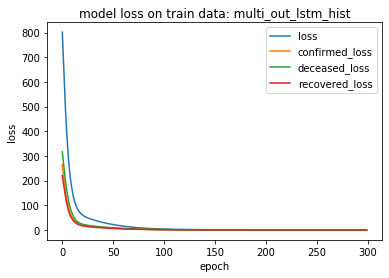

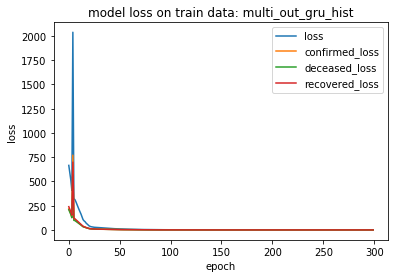

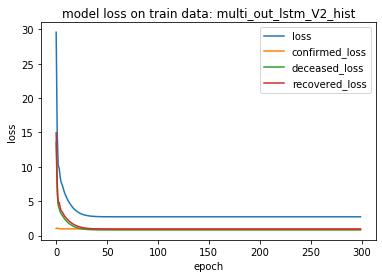

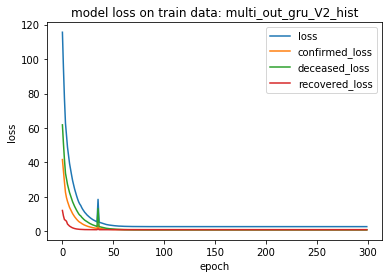

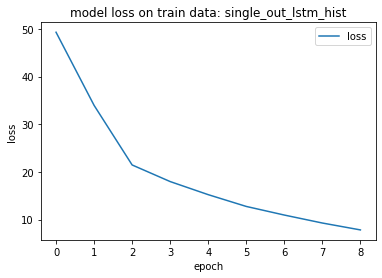

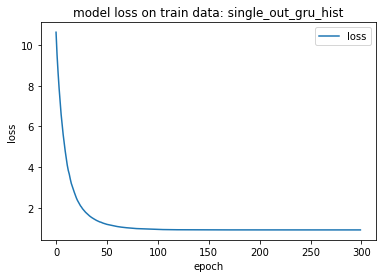

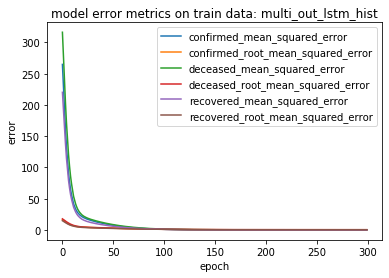

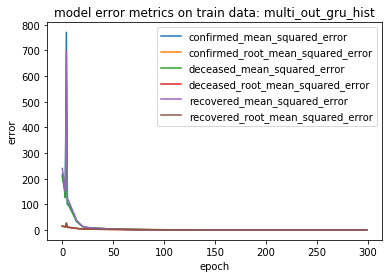

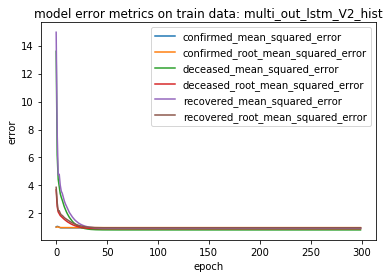

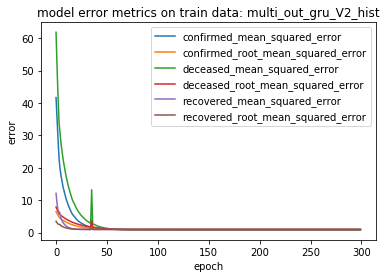

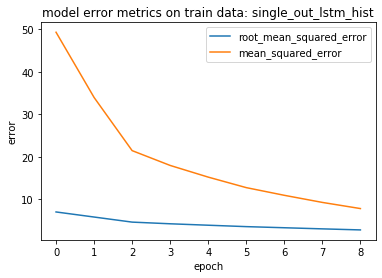

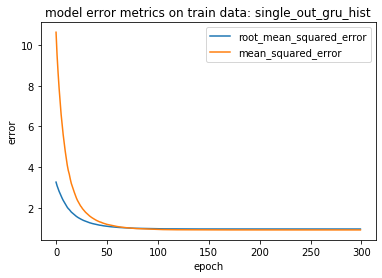

In [107]:
plot_training_history(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_history(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_history(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_history(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_history_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_history_single(single_out_gru_hist, "single_out_gru_hist")

plot_training_metrics(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_metrics(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_metrics(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_metrics(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_metrics_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_metrics_single(single_out_gru_hist, "single_out_gru_hist")

In [108]:
print("multi_out_lstm_eval")
pprint(multi_out_lstm_eval)
print()
print("multi_out_gru_eval")
pprint(multi_out_gru_eval)
print()
print("multi_out_lstm_V2_eval")
pprint(multi_out_lstm_V2_eval)
print()
print("multi_out_gru_V2_eval")
pprint(multi_out_gru_V2_eval)
print()
print("single_out_lstm_eval")
pprint(single_out_lstm_eval)
print()
print("single_out_gru_eval")
pprint(single_out_gru_eval)

multi_out_lstm_eval
{'confirmed_loss': 0.09697499871253967,
 'confirmed_mean_squared_error': 0.09697499871253967,
 'confirmed_root_mean_squared_error': 0.3114081025123596,
 'deceased_loss': 0.22938574850559235,
 'deceased_mean_squared_error': 0.22938574850559235,
 'deceased_root_mean_squared_error': 0.47894230484962463,
 'loss': 0.49166780710220337,
 'recovered_loss': 0.16530710458755493,
 'recovered_mean_squared_error': 0.16530710458755493,
 'recovered_root_mean_squared_error': 0.40657973289489746}

multi_out_gru_eval
{'confirmed_loss': 0.08694641292095184,
 'confirmed_mean_squared_error': 0.08694641292095184,
 'confirmed_root_mean_squared_error': 0.29486677050590515,
 'deceased_loss': 0.17537102103233337,
 'deceased_mean_squared_error': 0.17537102103233337,
 'deceased_root_mean_squared_error': 0.41877320408821106,
 'loss': 0.41371405124664307,
 'recovered_loss': 0.15139663219451904,
 'recovered_mean_squared_error': 0.15139663219451904,
 'recovered_root_mean_squared_error': 0.38909721